## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice= merge_data["Mouse ID"].unique()
num_mice= len(unique_mice)
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = merge_data.loc[merge_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_data[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data[merge_data['Mouse ID'].isin(duplicate_data)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_clean= clean_data["Mouse ID"].unique()
num_clean= len(unique_clean)
num_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
standard_deviation = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
SEM = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Mean tumor volume":mean, 
                            "Median tumor volume":median, 
                           "Variance of tumor volume":variance, 
                           "Standard deviation of tumor volume .":standard_deviation, 
                           "SEM tumor volume":SEM})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_total=clean_data["Timepoint"].value_counts()
timepoint_total


0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

<AxesSubplot:title={'center':'Number of mice with each timepoint'}, xlabel='Timepoints', ylabel='Number of mice'>

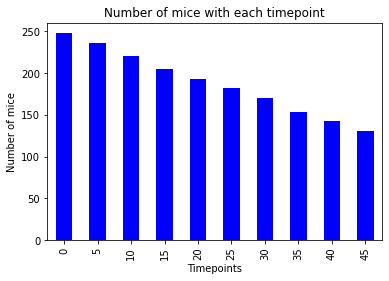

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_bar = timepoint_total.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Timepoints")
plt.ylabel("Number of mice")
plt.title("Number of mice with each timepoint")


timepoint_bar


Text(0.5, 1.0, 'Female vs. Male Mice')

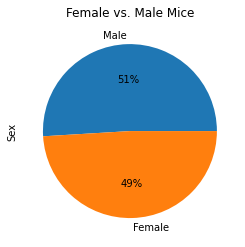

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_male_pie=clean_data["Sex"].value_counts()
fem_male_pie.plot(kind="pie",autopct='%1.0f%%')
plt.title("Female vs. Male Mice")


# plt.show()


([<matplotlib.patches.Wedge at 0x1d32258d790>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'male'),
  Text(0.033082014082615095, -1.0995024239828841, 'female')])

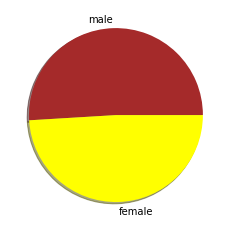

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_data["Sex"].value_counts(),labels=["male","female"],
        colors=['brown','yellow'],shadow = True)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_data.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_latest = pd.merge(last_timepoint , clean_data, on=["Mouse ID","Timepoint"])
merged_latest

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tv_data=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    tv_container = merged_latest.loc[merged_latest["Drug Regimen"]== x,"Tumor Volume (mm3)"] 
    # add subset 
    tv_data.append(tv_container)

    # Determine outliers using upper and lower bounds
    quartiles = tv_container.quantile([.25,.75])
    low_q = quartiles[.25]
    up_q = quartiles[.75]
    inter_qr = up_q - low_q
    lower_b = low_q - (1.5 * inter_qr)
    upper_b = up_q + (1.5 * inter_qr)
    outliers = tv_container.loc[(tv_container > lower_b) | (tv_container < upper_b)]
    print(f"{x}'s potential outliers: \n{outliers}\n")

Capomulin's potential outliers: 
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers: 
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64

I

C:\Users\shupe\AppData\Local\Temp\ipykernel_16108\4189198452.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


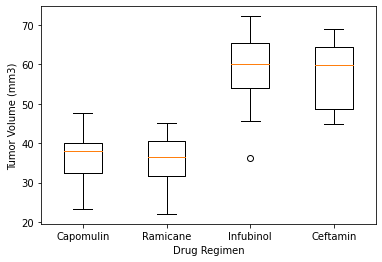

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tv_data)
x = [1,2,3,4]
plt.xticks(x,treatments)
fig1.show()

## Line and Scatter Plots

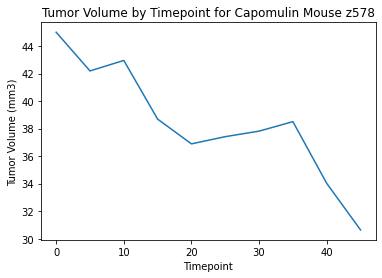

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
column_value = merge_data.loc[80, "Mouse ID"]
Capomulin_mouse=merge_data.loc[merge_data["Mouse ID"] == column_value]

Capomulin_time = Capomulin_mouse["Timepoint"]
Capomulin_volume = Capomulin_mouse["Tumor Volume (mm3)"]

x_axis = np.arange(0,45,0.5)

plt.plot(Capomulin_time, Capomulin_volume)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume by Timepoint for Capomulin Mouse {column_value}")

plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

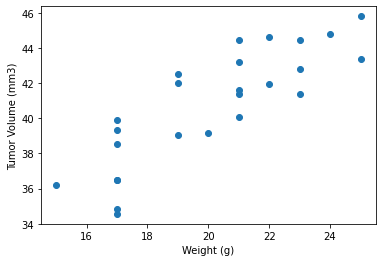

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_drug = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_drug.groupby(['Mouse ID']).mean()

tv_cap_avg = capomulin_avg['Tumor Volume (mm3)']
weight_cap_avg = capomulin_avg['Weight (g)']

plt.scatter(weight_cap_avg, tv_cap_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = np.corrcoef(weight_cap_avg,tv_cap_avg)[0,1]
print(correlation)
slope, intercept, r_value, p_value, std_err = st.linregress(weight_cap_avg,tv_cap_avg)
print(slope)
print(intercept)

0.8419363424694722
0.9544396890241049
21.552160532685008


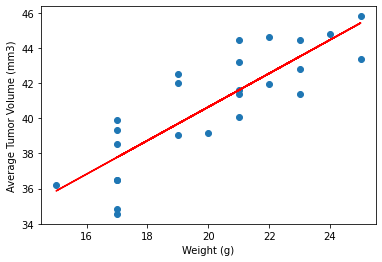

In [19]:
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],capomulin_avg['Weight (g)']*slope + intercept,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()